## API kaggle

Analyse des différentes données présentent  dans le fichier csv

Basic Statistics:
          Placed  Eliminations    Assists    Revives        Hits  Head Shots  \
count  87.000000     87.000000  87.000000  87.000000   87.000000   87.000000   
mean   22.045977      2.517241   1.482759   0.402299   29.735632    4.747126   
std    13.145791      1.885453   1.388173   0.738631   22.093596    5.777298   
min     1.000000      0.000000   0.000000   0.000000    1.000000    0.000000   
25%    15.000000      1.000000   0.000000   0.000000   12.000000    1.000000   
50%    21.000000      2.000000   1.000000   0.000000   27.000000    3.000000   
75%    28.500000      3.000000   2.000000   1.000000   38.000000    6.500000   
max    66.000000      8.000000   6.000000   4.000000  105.000000   33.000000   

       Distance Traveled  Materials Gathered  Materials Used  Damage Taken  \
count          87.000000           87.000000       87.000000     87.000000   
mean         1137.146322          386.574713      122.712644    244.172414   
std          1110.843642   

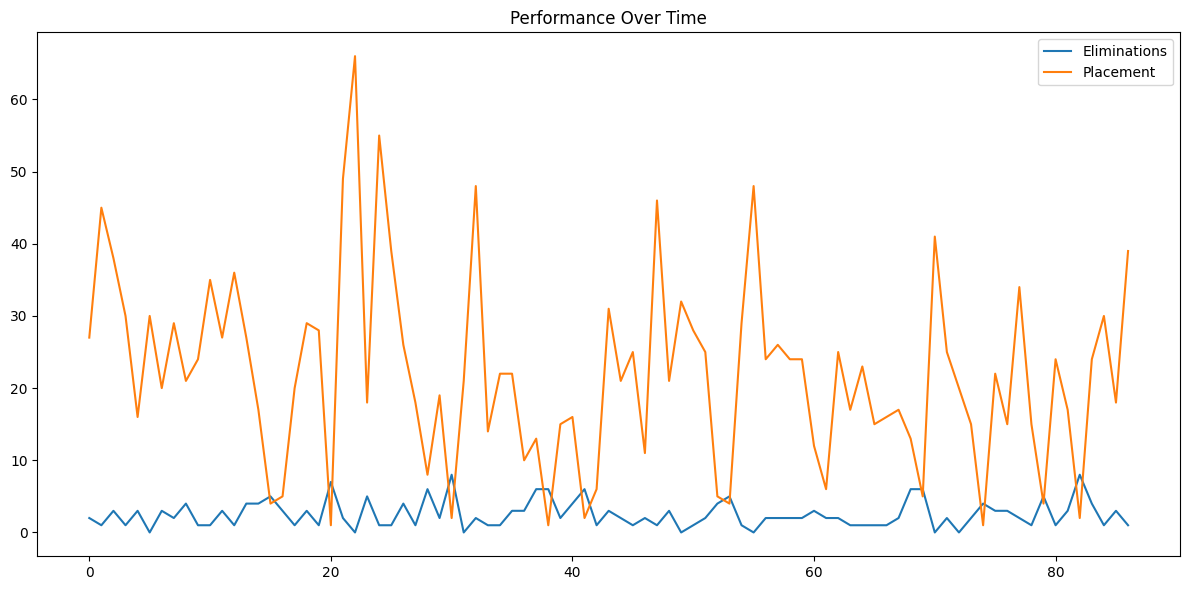

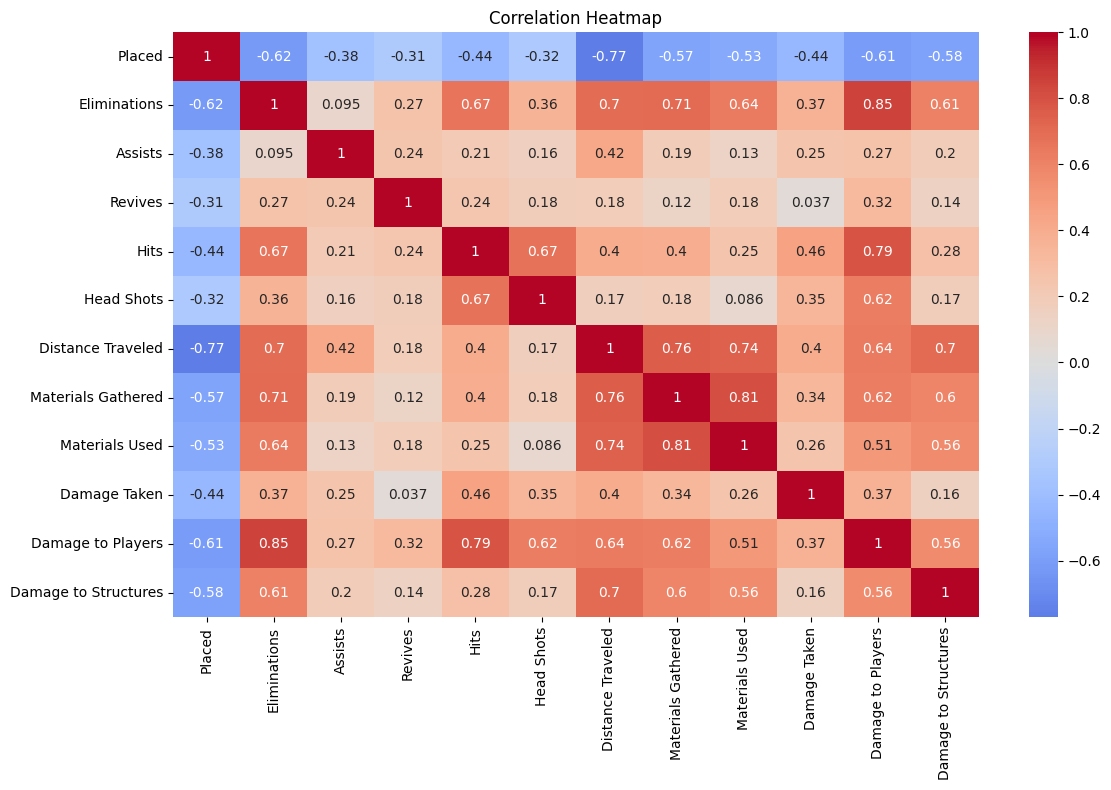


Build Efficiency by Mental State:
Mental State
high     inf
sober    inf
Name: build_efficiency, dtype: float64


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


df = pd.read_csv('./Data/raw/FortniteStatistics.csv')


def basic_stats(df):
    return df.describe()


def mental_state_analysis(df):
    mental_stats = df.groupby('Mental State').agg({
        'Eliminations': 'mean',
        'Placed': 'mean',
        'Accuracy': lambda x: x.str.rstrip('%').astype(float).mean(),
        'Damage to Players': 'mean'
    }).round(2)
    return mental_stats


def plot_performance_over_time():
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(df)), df['Eliminations'], label='Eliminations')
    plt.plot(range(len(df)), df['Placed'], label='Placement')
    plt.title('Performance Over Time')
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_correlation_heatmap(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    correlation = df[numeric_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()


def create_interactive_scatter():
    fig = px.scatter(df, 
                    x='Accuracy', 
                    y='Eliminations',
                    color='Mental State',
                    size='Damage to Players',
                    hover_data=['Time of Day', 'Placed'],
                    title='Accuracy vs Eliminations')
    return fig


def analyze_time_performance():
    fig = go.Figure()
    
    for state in df['Mental State'].unique():
        state_data = df[df['Mental State'] == state]
        fig.add_trace(go.Box(
            y=state_data['Eliminations'],
            name=state,
            boxpoints='all',
            jitter=0.3,
            pointpos=-1.8
        ))
    
    fig.update_layout(
        title='Elimination Distribution by Mental State',
        yaxis_title='Eliminations',
        boxmode='group'
    )
    return fig


def analyze_build_efficiency(df):
    df['build_efficiency'] = df['Damage to Structures'] / df['Materials Used']
    return df.groupby('Mental State')['build_efficiency'].mean()


print("Basic Statistics:")
print(basic_stats(df))

print("\nMental State Analysis:")
print(mental_state_analysis(df))


plot_performance_over_time()
plot_correlation_heatmap(df)
interactive_scatter = create_interactive_scatter()
time_performance = analyze_time_performance()
print("\nBuild Efficiency by Mental State:")
print(analyze_build_efficiency(df))

C:\Users\AMADOU\AppData\Local\Temp\ipykernel_7404\4281490033.py:79: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



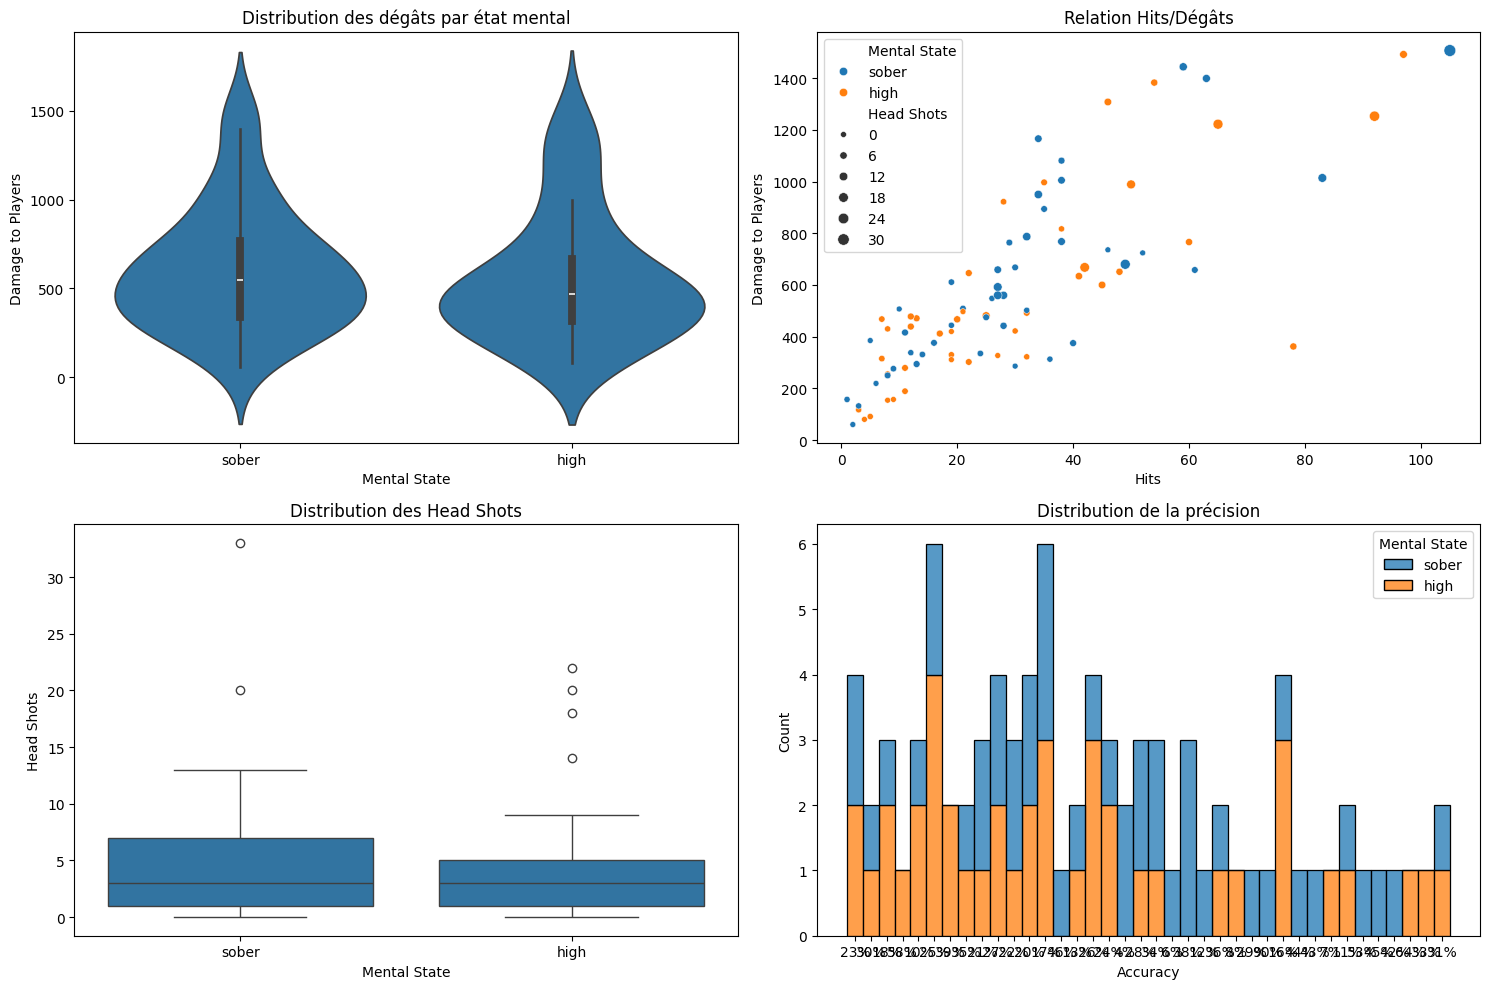

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


df = pd.read_csv('./Data/raw/FortniteStatistics.csv')


def plot_daily_performance():
    daily_stats = df.groupby('Date').agg({
        'Eliminations': 'mean',
        'Placed': 'mean',
        'Accuracy': lambda x: x.str.rstrip('%').astype(float).mean()
    })
    
    fig = make_subplots(rows=3, cols=1, subplot_titles=('Eliminations', 'Placement', 'Accuracy'))
    
    fig.add_trace(go.Scatter(x=daily_stats.index, y=daily_stats['Eliminations'], mode='lines+markers', name='Eliminations'), row=1, col=1)
    fig.add_trace(go.Scatter(x=daily_stats.index, y=daily_stats['Placed'], mode='lines+markers', name='Placement'), row=2, col=1)
    fig.add_trace(go.Scatter(x=daily_stats.index, y=daily_stats['Accuracy'], mode='lines+markers', name='Accuracy'), row=3, col=1)
    
    fig.update_layout(height=1000, title_text="Performance quotidienne")
    return fig


def combat_analysis():
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    sns.violinplot(x='Mental State', y='Damage to Players', data=df)
    plt.title('Distribution des dégâts par état mental')
    
    plt.subplot(2, 2, 2)
    sns.scatterplot(data=df, x='Hits', y='Damage to Players', hue='Mental State', size='Head Shots')
    plt.title('Relation Hits/Dégâts')
    
    plt.subplot(2, 2, 3)
    sns.boxplot(x='Mental State', y='Head Shots', data=df)
    plt.title('Distribution des Head Shots')
    
    plt.subplot(2, 2, 4)
    sns.histplot(data=df, x='Accuracy', hue='Mental State', multiple="stack")
    plt.title('Distribution de la précision')
    
    plt.tight_layout()
    return plt


def resource_analysis():
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=df['Materials Gathered'],
        y=df['Materials Used'],
        mode='markers',
        marker=dict(
            size=df['Damage to Structures']/100,
            color=df['Placed'],
            colorscale='Viridis',
            showscale=True
        ),
        text=df['Mental State'],
        name='Resources'
    ))
    
    fig.update_layout(
        title='Analyse des ressources',
        xaxis_title='Matériaux récoltés',
        yaxis_title='Matériaux utilisés',
        showlegend=True
    )
    return fig

def hourly_performance():
    df['Hour'] = pd.to_datetime(df['Time of Day']).dt.hour
    
    hourly_stats = df.groupby(['Hour', 'Mental State']).agg({
        'Eliminations': 'mean',
        'Placed': 'mean',
        'Damage to Players': 'mean'
    }).reset_index()
    
    fig = make_subplots(rows=3, cols=1, subplot_titles=('Eliminations', 'Placement', 'Damage'))
    
    for state in hourly_stats['Mental State'].unique():
        state_data = hourly_stats[hourly_stats['Mental State'] == state]
        
        fig.add_trace(go.Scatter(x=state_data['Hour'], y=state_data['Eliminations'],
                                mode='lines+markers', name=f'{state} - Eliminations'), row=1, col=1)
        fig.add_trace(go.Scatter(x=state_data['Hour'], y=state_data['Placed'],
                                mode='lines+markers', name=f'{state} - Placed'), row=2, col=1)
        fig.add_trace(go.Scatter(x=state_data['Hour'], y=state_data['Damage to Players'],
                                mode='lines+markers', name=f'{state} - Damage'), row=3, col=1)
    
    fig.update_layout(height=900, title_text="Performance horaire par état mental")
    return fig


def performance_radar():
    metrics = ['Eliminations', 'Accuracy', 'Head Shots', 'Distance Traveled', 'Damage to Players']
    
    stats = df.groupby('Mental State').agg({
        'Eliminations': 'mean',
        'Accuracy': lambda x: x.str.rstrip('%').astype(float).mean(),
        'Head Shots': 'mean',
        'Distance Traveled': 'mean',
        'Damage to Players': 'mean'
    })
    
    
    for col in stats.columns:
        stats[col] = (stats[col] - stats[col].min()) / (stats[col].max() - stats[col].min())
    
    fig = go.Figure()
    
    for state in stats.index:
        fig.add_trace(go.Scatterpolar(
            r=stats.loc[state],
            theta=metrics,
            fill='toself',
            name=state
        ))
    
    fig.update_layout(
        polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
        showlegend=True,
        title='Radar des performances par état mental'
    )
    return fig

daily_perf = plot_daily_performance()
combat_analysis()
resource_analysis_fig = resource_analysis()
hourly_perf = hourly_performance()
radar_chart = performance_radar()

Performance par état mental :
              Eliminations  Damage to Players  Accuracy
Mental State                                           
high              2.500000         557.547619  0.245238
sober             2.533333         604.377778  0.274000


C:\Users\AMADOU\AppData\Local\Temp\ipykernel_7404\3843291228.py:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




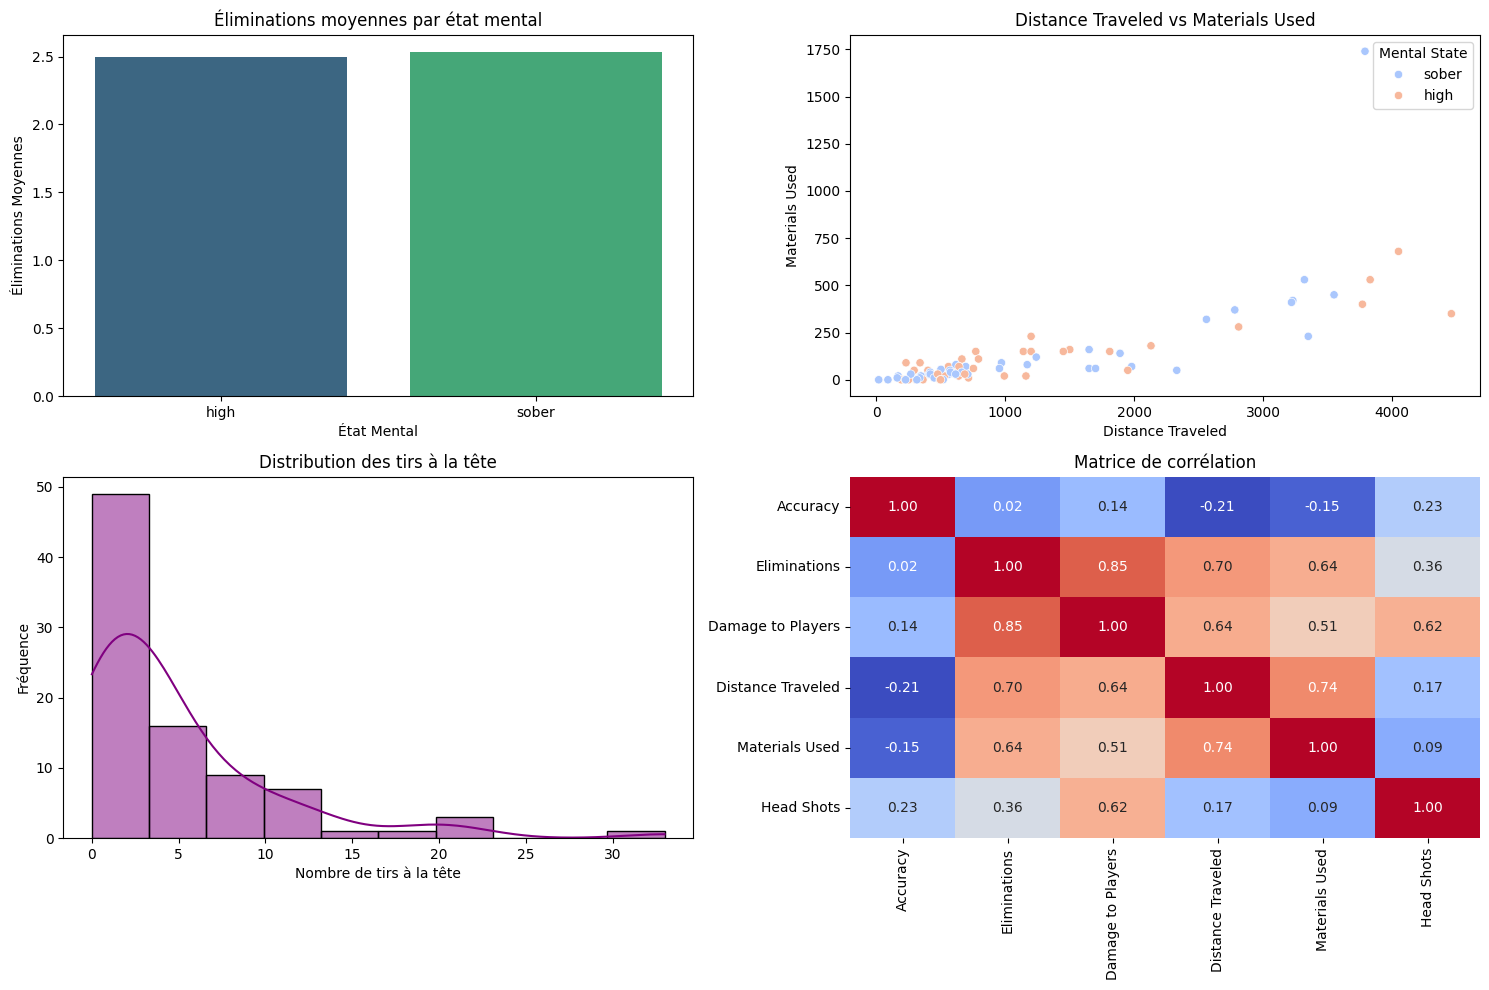


Résumé statistique :
        Accuracy  Eliminations  Damage to Players  Distance Traveled  \
count  87.000000     87.000000          87.000000          87.000000   
mean    0.260115      2.517241         581.770115        1137.146322   
std     0.134713      1.885453         354.172396        1110.843642   
min     0.040000      0.000000          60.000000          17.860000   
25%     0.170000      1.000000         328.500000         398.280000   
50%     0.250000      2.000000         481.000000         638.170000   
75%     0.320000      3.000000         750.000000        1575.000000   
max     0.900000      8.000000        1507.000000        4460.000000   

       Materials Used  Head Shots  
count       87.000000   87.000000  
mean       122.712644    4.747126  
std        225.170370    5.777298  
min          0.000000    0.000000  
25%         20.000000    1.000000  
50%         50.000000    3.000000  
75%        145.000000    6.500000  
max       1740.000000   33.000000  

Comp

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def parse_date(date_str):
    try:
        return
        return pd.to_datetime(date_str, format='%m/%d')
    except:
        try:
            return pd.to_datetime(date_str, format='%d-%b')
        except:
            try:
                return pd.to_datetime(date_str)
            except:
                print(f"Format de date non reconnu : {date_str}")
                return pd.NaT

try:
    data = pd.read_csv("./Data/raw/FortniteStatistics.csv")
    
    data['Date'] = data['Date'].apply(parse_date)
except FileNotFoundError:
    print("Le fichier FortniteStatistics.csv est introuvable.")
    exit()


numeric_columns = ['Accuracy', 'Eliminations', 'Damage to Players', 'Distance Traveled', 'Materials Used', 'Head Shots']
for col in numeric_columns:
    if col == 'Accuracy':
        
        data[col] = pd.to_numeric(data[col].str.replace('%', ''), errors='coerce') / 100
    else:
        data[col] = pd.to_numeric(data[col], errors='coerce')


data = data.dropna(subset=numeric_columns)


performance_by_state = data.groupby('Mental State')[['Eliminations', 'Damage to Players', 'Accuracy']].mean()
print("Performance par état mental :")
print(performance_by_state)

plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
sns.barplot(x=performance_by_state.index, y=performance_by_state['Eliminations'], palette="viridis")
plt.title("Éliminations moyennes par état mental")
plt.ylabel("Éliminations Moyennes")
plt.xlabel("État Mental")


plt.subplot(2, 2, 2)
sns.scatterplot(data=data, x='Distance Traveled', y='Materials Used', hue='Mental State', palette="coolwarm")
plt.title("Distance Traveled vs Materials Used")
plt.xlabel("Distance Traveled")
plt.ylabel("Materials Used")


plt.subplot(2, 2, 3)
sns.histplot(data['Head Shots'], kde=True, bins=10, color="purple")
plt.title("Distribution des tirs à la tête")
plt.xlabel("Nombre de tirs à la tête")
plt.ylabel("Fréquence")


plt.subplot(2, 2, 4)
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=False)
plt.title("Matrice de corrélation")

plt.tight_layout()
plt.show()


print("\nRésumé statistique :")
print(data[numeric_columns].describe())


print("\nComparaison états mental :")
print(data.groupby('Mental State')[numeric_columns].mean())